# Bayesian t-test
二標本の平均値の差に対するBayesian t-testのスクリプトをPythonで書く．

### 分析環境準備
必要なパッケージの読み込み

In [70]:
import pandas as pd
import numpy as np
from scipy.stats import norm 
from scipy.stats import uniform
import matplotlib.pyplot as plt
%matplotlib inline

パラメータを設定する．二標本の標本サイズ・平均・分散を定義する．分散は等しいものとする．

In [2]:
N_01   = 100 
mu_01  = 100
sig_01 = 10

N_02   = 100
mu_02  = 105
sig_02 = 10

乱数のシードを設定した上でデータを生成する．

In [4]:
np.random.seed(123)
pop_01 = np.random.normal(loc = mu_01, scale = sig_01, size = N_01)
pop_02 = np.random.normal(loc = mu_02, scale = sig_02, size = N_02)

尤度を定義する．正規分布に従う確率変数$y$の尤度は以下の通り：
$$ L(y|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\rm{Exp}\left[-\frac{(y - \mu)^2}{2\sigma^2}\right] $$

In [90]:
def likelihood(pars):
    mu_01  = pars[0]
    sig_01 = pars[1]
    mu_02  = pars[2]
    sig_02 = pars[3]
    
    return(sum(np.log(norm.pdf(x = pop_01, loc = mu_01, scale = sig_01))) +
           sum(np.log(norm.pdf(x = pop_02, loc = mu_02, scale = sig_02))))

In [89]:
likelihood(pars)

-1068.3974145367586

事前分布の定義．$\mu$，$\sigma^2$それぞれ事前分布として一様分布を仮定する．

In [45]:
def prior(pars):
    mu_01  = pars[0]
    sig_01 = pars[1]
    mu_02  = pars[2]
    sig_02 = pars[3]

    ll_01 = np.log(uniform.pdf(mu_01,  loc = -10000, scale = 20000))
    ll_02 = np.log(uniform.pdf(sig_01, loc = -10000, scale = 20000))
    ll_03 = np.log(uniform.pdf(mu_02,  loc = -10000, scale = 20000))
    ll_04 = np.log(uniform.pdf(sig_02, loc = -10000, scale = 20000))
    
    return(ll_01 + ll_02 + ll_03 + ll_04)

In [41]:
pars = [mu_01, sig_01, mu_02, sig_02]

事後分布の定義．logスケールなので，加算するだけ．

In [91]:
def posterior(pars):
    return(likelihood(pars) + prior(pars))    

### 分析実行
以上で分析のための条件設定が完了．以下，シミュレーションのための諸条件設定．

In [98]:
N_iter = 3000
pars = [50, 30, 20, 50]
results = np.zeros((N_iter, 8))
results[0, :] = np.hstack((pars, [0, 0, 0, 0]))

In [108]:
%%time
candidate = pars
for i in range(1, N_iter):
    for j in range(4):
#        candidate = pars
        proposal = candidate
        proposal[j] = candidate[j] + np.random.normal(scale = 0.5)
        ratio = max(0, np.exp(posterior(proposal) - posterior(candidate)))
        t = np.random.uniform()
        if (t < ratio):
            candidate = proposal

    results[i, :] = np.hstack((candidate, [ratio, t, posterior(proposal), posterior(candidate)]))

CPU times: user 20.1 s, sys: 113 ms, total: 20.2 s
Wall time: 20.4 s


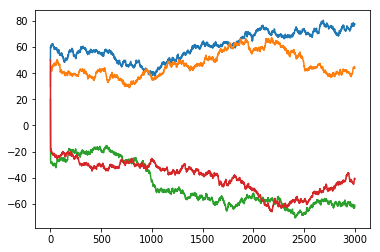

In [109]:
plt.plot(results[:, 0])
plt.plot(results[:, 1])


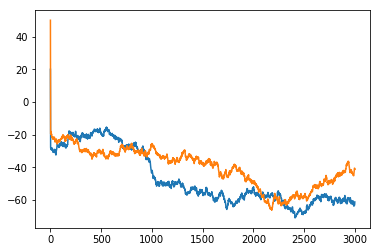

In [110]:
plt.plot(results[:, 2])
plt.plot(results[:, 3])